<a href="https://colab.research.google.com/github/nida-afzal/Tahoe100M-Exploration/blob/main/Tahoe_100M_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [2]:
from datasets import load_dataset

# Load the dataset in streaming mode
dataset = load_dataset("vevotx/Tahoe-100M", split="train", streaming=True)

# Convert the iterable dataset into an iterator
dataset_iter = iter(dataset)

# Retrieve the first 1000 records
subset_size = 1000
subset = [next(dataset_iter) for _ in range(subset_size)]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/3388 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/3388 [00:00<?, ?it/s]

In [3]:
import pandas as pd

# Create a DataFrame from the subset
df_subset = pd.DataFrame(subset)

# Display basic information
print(df_subset.info())
print(df_subset.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   genes               1000 non-null   object
 1   expressions         1000 non-null   object
 2   drug                1000 non-null   object
 3   sample              1000 non-null   object
 4   BARCODE_SUB_LIB_ID  1000 non-null   object
 5   cell_line_id        1000 non-null   object
 6   moa-fine            1000 non-null   object
 7   canonical_smiles    1000 non-null   object
 8   pubchem_cid         1000 non-null   object
 9   plate               1000 non-null   object
dtypes: object(10)
memory usage: 78.3+ KB
None
                                               genes  \
0  [1, 5, 19, 21, 31, 56, 68, 77, 78, 85, 99, 100...   
1  [1, 15, 19, 26, 32, 35, 38, 59, 70, 76, 78, 10...   
2  [1, 10, 11, 19, 23, 26, 31, 35, 43, 45, 56, 58...   
3  [1, 20, 21, 31, 45, 56, 68, 69, 77, 88, 103,

In [6]:
# Load 100 samples and collect unique gene IDs
gene_set = set()
for _ in range(100):
    row = next(dataset_iter)
    gene_set.update(row['genes'])

# Convert to list and show a few examples
gene_list = list(gene_set)
print("Sample gene IDs:", gene_list[:10])


Sample gene IDs: [1, 5, 32773, 7, 6, 9, 10, 11, 12, 13]


In [9]:
# Load gene metadata table using streaming
gene_meta = load_dataset("vevotx/Tahoe-100M", name="gene_metadata", split="train", streaming=True)
gene_meta_iter = iter(gene_meta)

# Peek at the first item to see what keys are available
first_item = next(gene_meta_iter)
print("Available keys:", first_item.keys())

# Reset the iterator
gene_meta_iter = iter(gene_meta)

# Based on the available keys, use the correct key name for gene ID
# (assuming there is some ID field with a different name)
gene_id_map = {}
id_field = 'id'  # Replace with the actual ID field found in the keys

for _ in range(100):
    item = next(gene_meta_iter)
    gene_id_map[item[id_field]] = item  # Maps numeric ID to metadata

# Show a few mapped gene names
for gid in list(gene_id_map.keys())[:4]:  # Just show the first 4 we collected
    gene_info = gene_id_map.get(gid, {})
    print(f"Gene ID {gid}: {gene_info}")

Resolving data files:   0%|          | 0/3388 [00:00<?, ?it/s]

Available keys: dict_keys(['gene_symbol', 'ensembl_id', 'token_id'])


KeyError: 'id'

In [10]:
# Load gene metadata table using streaming
gene_meta = load_dataset("vevotx/Tahoe-100M", name="gene_metadata", split="train", streaming=True)
gene_meta_iter = iter(gene_meta)

# Now we know the available keys: 'gene_symbol', 'ensembl_id', 'token_id'
# Let's use 'ensembl_id' as our mapping key
gene_id_map = {}

for _ in range(100):
    item = next(gene_meta_iter)
    gene_id_map[item['ensembl_id']] = item  # Maps ensembl_id to metadata

# Show a few mapped genes
# We need to get the actual keys from our map since we don't know the values in advance
keys_list = list(gene_id_map.keys())
for i, ensembl_id in enumerate(keys_list[:4]):  # Show first 4 entries
    gene_info = gene_id_map[ensembl_id]
    print(f"Entry {i+1}:")
    print(f"  Ensembl ID: {ensembl_id}")
    print(f"  Gene Symbol: {gene_info['gene_symbol']}")
    print(f"  Token ID: {gene_info['token_id']}")
    print()

Resolving data files:   0%|          | 0/3388 [00:00<?, ?it/s]

Entry 1:
  Ensembl ID: ENSG00000000003
  Gene Symbol: TSPAN6
  Token ID: 3

Entry 2:
  Ensembl ID: ENSG00000000005
  Gene Symbol: TNMD
  Token ID: 4

Entry 3:
  Ensembl ID: ENSG00000000419
  Gene Symbol: DPM1
  Token ID: 5

Entry 4:
  Ensembl ID: ENSG00000000457
  Gene Symbol: SCYL3
  Token ID: 6



In [11]:
# Load gene metadata table using streaming
gene_meta = load_dataset("vevotx/Tahoe-100M", name="gene_metadata", split="train", streaming=True)
gene_meta_iter = iter(gene_meta)

# Now we know the available keys: 'gene_symbol', 'ensembl_id', 'token_id'
# Let's use 'ensembl_id' as our mapping key
gene_id_map = {}

for _ in range(100):
    item = next(gene_meta_iter)
    gene_id_map[item['ensembl_id']] = item  # Maps ensembl_id to metadata

# Show a few mapped genes
# We need to get the actual keys from our map since we don't know the values in advance
keys_list = list(gene_id_map.keys())
for i, ensembl_id in enumerate(keys_list[:4]):  # Show first 4 entries
    gene_info = gene_id_map[ensembl_id]
    print(f"Entry {i+1}:")
    print(f"  Ensembl ID: {ensembl_id}")
    print(f"  Gene Symbol: {gene_info['gene_symbol']}")
    print(f"  Token ID: {gene_info['token_id']}")
    print()

Resolving data files:   0%|          | 0/3388 [00:00<?, ?it/s]

Entry 1:
  Ensembl ID: ENSG00000000003
  Gene Symbol: TSPAN6
  Token ID: 3

Entry 2:
  Ensembl ID: ENSG00000000005
  Gene Symbol: TNMD
  Token ID: 4

Entry 3:
  Ensembl ID: ENSG00000000419
  Gene Symbol: DPM1
  Token ID: 5

Entry 4:
  Ensembl ID: ENSG00000000457
  Gene Symbol: SCYL3
  Token ID: 6



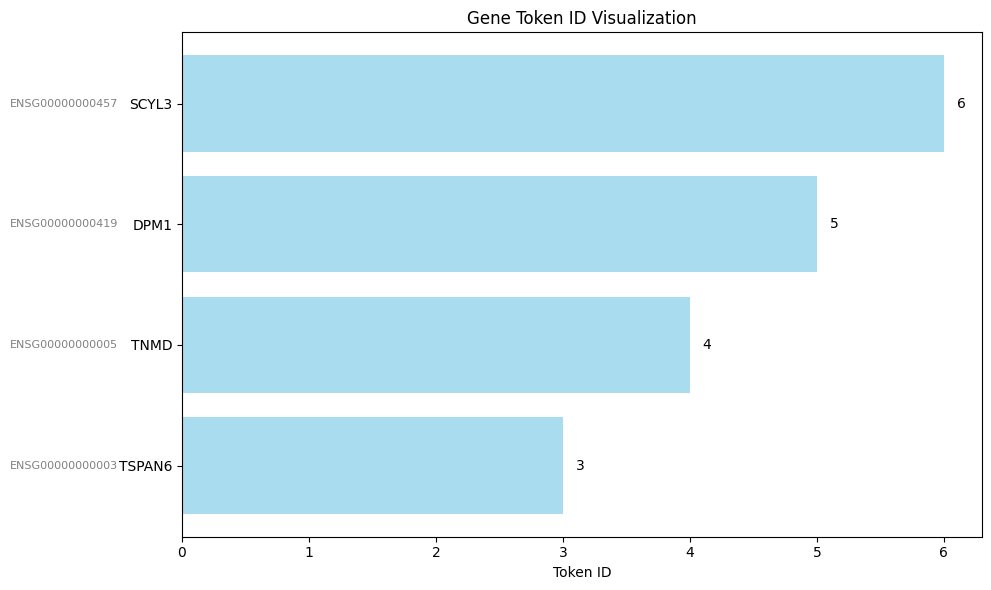

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the gene entries
ensembl_ids = ['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419', 'ENSG00000000457']
gene_symbols = ['TSPAN6', 'TNMD', 'DPM1', 'SCYL3']
token_ids = [3, 4, 5, 6]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bar chart
y_pos = np.arange(len(gene_symbols))
ax.barh(y_pos, token_ids, align='center', alpha=0.7, color='skyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(gene_symbols)

# Add Ensembl IDs as text beside the gene symbols
for i, ensembl in enumerate(ensembl_ids):
    ax.text(-0.5, i, ensembl, ha='right', va='center', fontsize=8, color='gray')

# Add token ID values at the end of each bar
for i, token in enumerate(token_ids):
    ax.text(token + 0.1, i, str(token), ha='left', va='center')

# Set labels and title
ax.set_xlabel('Token ID')
ax.set_title('Gene Token ID Visualization')

# Adjust layout and display
plt.tight_layout()
plt.show()

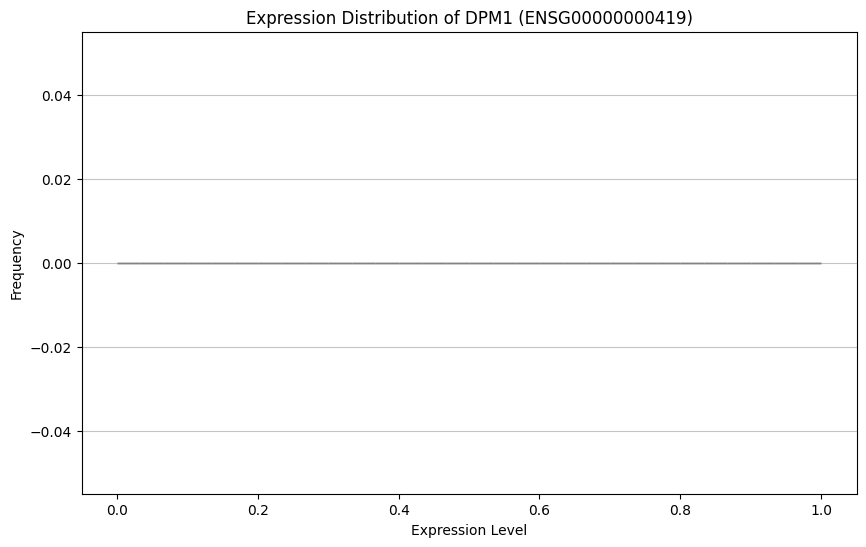

In [19]:
import matplotlib.pyplot as plt

# Replace with your gene of interest
gene_of_interest = 'ENSG00000000419'  # DPM1

# First, we need to find this gene's token_id to match it in the expression data
# Assuming you've loaded the gene metadata and created a mapping
gene_token_id = None
for ensembl_id, info in gene_id_map.items():
    if ensembl_id == gene_of_interest:
        gene_token_id = str(info['token_id'])
        gene_symbol = info['gene_symbol']
        break

if gene_token_id:
    # Filter for entries that contain the gene token ID
    gene_expressions = df_subset[df_subset['genes'].apply(lambda x: gene_token_id in x)]

    # Extract expression values
    expression_values = []
    for idx, row in gene_expressions.iterrows():
        try:
            gene_idx = row['genes'].index(gene_token_id)
            expression_values.append(row['expressions'][gene_idx])
        except (ValueError, IndexError):
            continue

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(expression_values, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Expression Distribution of {gene_symbol} ({gene_of_interest})')
    plt.xlabel('Expression Level')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print(f"Gene {gene_of_interest} not found in metadata.")

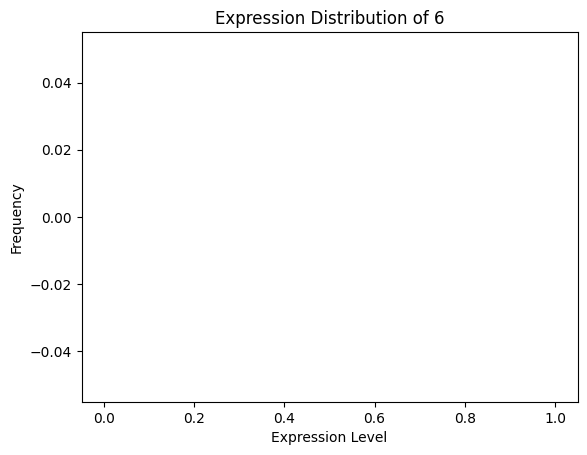

In [16]:
import matplotlib.pyplot as plt

# Replace 'gene_of_interest' with the actual gene identifier
gene_of_interest = '6'

# Filter for non-zero expressions of the gene
gene_expressions = df_subset[df_subset['genes'].apply(lambda x: gene_of_interest in x)]

# Extract expression values
expression_values = gene_expressions['expressions'].apply(lambda x: x[x.index(gene_of_interest)])

# Plot the distribution
plt.hist(expression_values, bins=30)
plt.title(f'Expression Distribution of {gene_of_interest}')
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.show()
